## Data Gathering

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [1]:

path = r"train.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Step 2 perform basic data qulity check

In [2]:
df.shape

(2000, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:


df.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:

df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [7]:

# check for missing data
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
# check for duplicated rows
df.duplicated().sum()

0

In [9]:
df = df.drop_duplicates()

## Separate X and Y features

In [10]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:

X = df.drop(columns=['price_range'])
Y = df[['price_range']]

In [12]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
y.head()

## Data Preprocessing and Data Cleaning

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:

pre = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [15]:

X_pre = pre.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.7,test_size=0.3,random_state=21)


In [18]:

xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1200,-1.612805,-0.990050,1.075937,-1.019184,-0.762495,-1.043966,-0.002563,-0.699686,-1.476344,0.646842,1.663176,-1.345839,-0.554317,-1.074463,1.114266,0.283103,-0.917331,-1.786861,0.994018,-1.014099
622,-0.030772,-0.990050,-1.007906,0.981177,-0.992890,0.957886,-1.656260,0.340740,-0.063548,1.084046,-1.470690,-0.964925,-0.348342,0.507890,-0.072765,1.201522,0.730240,0.559641,0.994018,-1.014099
658,1.564918,1.010051,-0.517590,-1.019184,2.002254,0.957886,0.989655,-1.046495,1.094945,0.646842,1.168355,-0.617820,-0.582089,1.553571,1.114266,1.431127,1.096367,0.559641,0.994018,-1.014099
1990,0.861540,1.010051,1.075937,-1.019184,0.850275,0.957886,0.217930,1.034357,-1.561112,-1.539175,-0.151168,0.220642,0.403814,-1.685827,-1.734608,-0.635317,-0.734267,0.559641,-1.006018,-1.014099
310,0.399450,1.010051,-0.027274,0.981177,0.159088,-1.043966,0.658915,-0.006069,1.123201,-1.101971,-0.645989,-1.354854,-0.308998,1.259416,0.876859,1.431127,0.364113,-1.786861,0.994018,-1.014099


In [19]:

xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
541,-1.014136,-0.990050,-0.395011,0.981177,-0.762495,0.957886,0.328176,0.340740,1.010178,-0.227564,-0.481048,1.309289,1.304086,0.935753,-1.497202,-1.094526,0.181050,0.559641,0.994018,0.986097
1211,-1.196241,1.010051,0.095305,-1.019184,0.619880,0.957886,-1.656260,-0.352878,1.151457,1.521249,-0.151168,1.275480,0.292726,-1.511547,-0.547577,0.053498,-1.283457,0.559641,0.994018,0.986097
1862,-0.445060,-0.990050,1.443675,-1.019184,-0.301703,-1.043966,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,0.559641,-1.006018,-1.014099
1094,-1.253148,1.010051,-0.027274,-1.019184,-0.992890,-1.043966,-1.656260,1.727974,-1.448088,-0.664768,-1.305750,-0.843213,-0.885265,-1.598226,-1.734608,-0.864922,-0.551204,0.559641,0.994018,0.986097
465,0.784145,1.010051,0.095305,-1.019184,0.159088,0.957886,0.548669,1.034357,-0.628666,-0.664768,0.013773,-0.834197,-0.901466,1.408799,0.402047,0.971917,-0.368140,0.559641,-1.006018,-1.014099


In [20]:

ytrain.head()

,price_range
1200,0
622,2
658,3
1990,0
310,3


In [21]:
ytest.head()

,price_range
541,3
1211,0
1862,0
1094,0
465,3


## Build the model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:

model = LogisticRegression()
model.fit(xtrain,ytrain)

e:\anaconda3.3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:

model.classes_

array([0, 1, 2, 3], dtype=int64)

In [25]:
ypred_train = model.predict(xtrain)

In [26]:
yprob_train = model.predict_proba(xtrain)

In [27]:
yprob_train[0]

array([9.98488713e-01, 1.51125965e-03, 2.69711636e-08, 6.86065896e-16])

In [28]:
model.classes_

array([0, 1, 2, 3], dtype=int64)

In [29]:
ypred_train[:5]

array([0, 2, 3, 0, 3], dtype=int64)

In [30]:

ytrain.head()

,price_range
1200,0
622,2
658,3
1990,0
310,3


## Model Evaluation

In [31]:
model.score(xtrain,ytrain)

0.9728571428571429

In [32]:

model.score(xtest,ytest)

0.9583333333333334

## Confusion Matrix

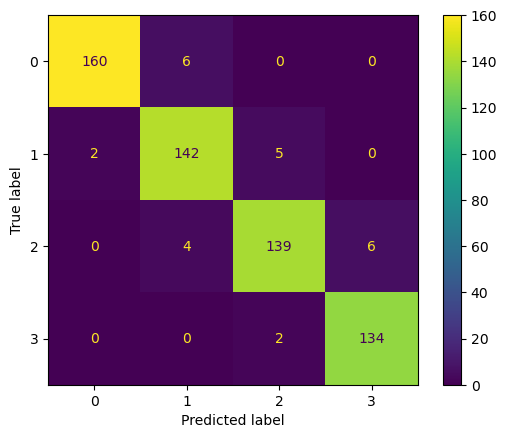

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

## Classification Report

In [34]:
ypred_test = model.predict(xtest)


In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       166
           1       0.93      0.95      0.94       149
           2       0.95      0.93      0.94       149
           3       0.96      0.99      0.97       136

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [36]:
from sklearn.metrics import f1_score
f1_score(ytest,ypred_test,average='macro')

0.9581296812228755


All the scores are greater than 80%(0.80), we can consider this model for final model building